<a href="https://colab.research.google.com/github/Misbah430/DevelopersHub-Internship-tasks/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [ ]:
df=pd.read_csv('/content/archive (1).zip')
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df = df.dropna()
df.fillna(df.mean(numeric_only=True), inplace=True)

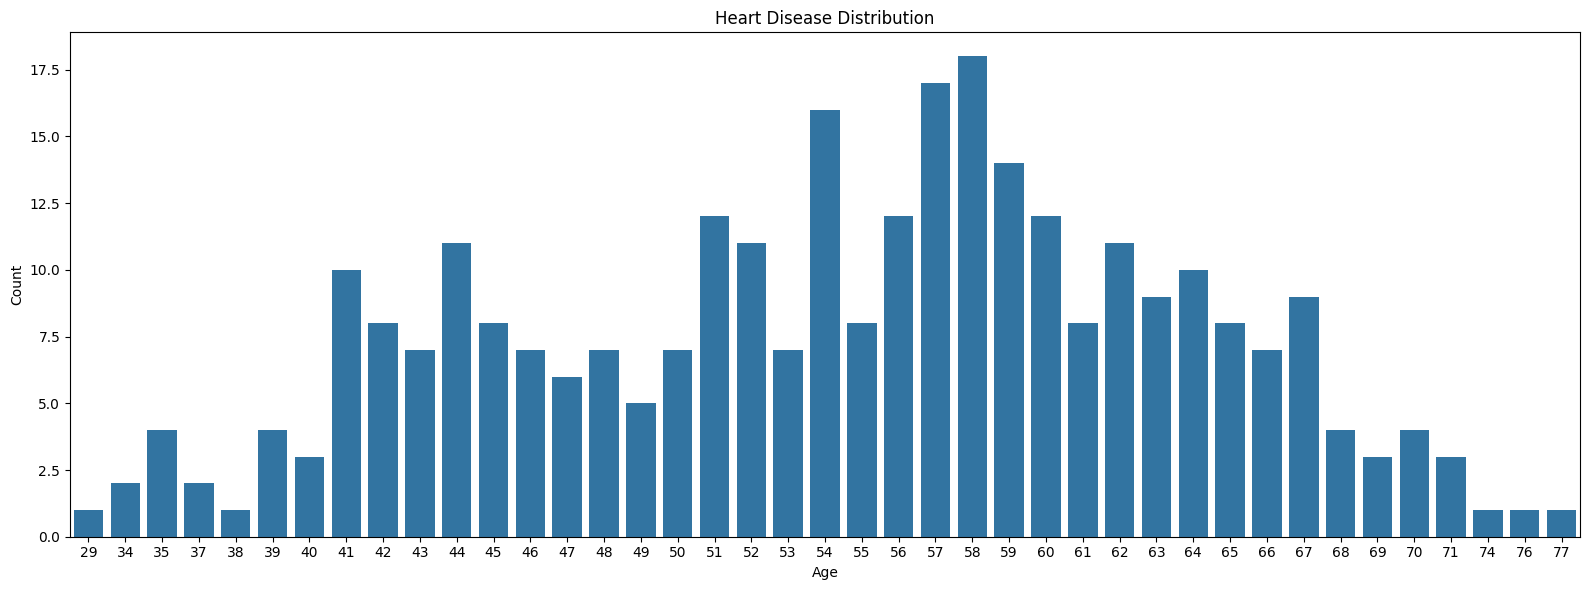

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(x='age', data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


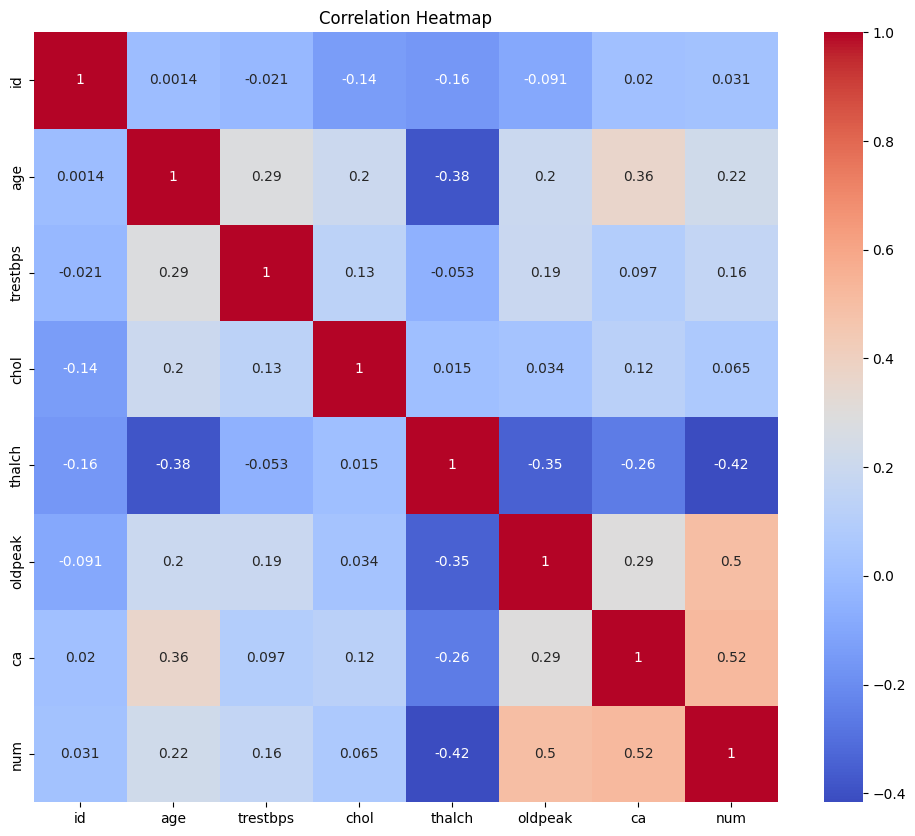

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('num', axis=1) # Change target to 'num'
y = df['num'] # Keep 'num' as is for now

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert 'num' to binary (0 or 1) after splitting
y_train = y_train.apply(lambda x: 1 if x > 0 else 0)
y_test = y_test.apply(lambda x: 1 if x > 0 else 0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from IPython import get_ipython
from IPython.display import display

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8833333333333333
Confusion Matrix:
 [[32  3]
 [ 4 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.88      0.84      0.86        25

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



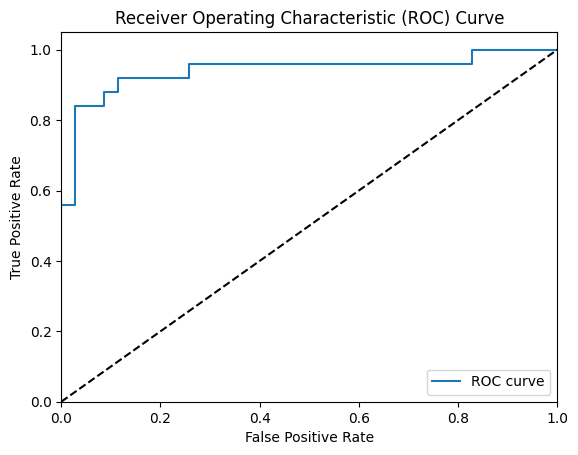

ROC AUC Score: 0.9405714285714285
id: 0.2403
age: -0.0258
trestbps: 0.3660
chol: 0.2163
thalch: -0.2729
oldpeak: 0.4819
ca: 1.0781
sex_Male: 0.7223
dataset_Hungary: 0.0778
dataset_VA Long Beach: 0.1086
cp_atypical angina: -0.2340
cp_non-anginal: -0.7684
cp_typical angina: -0.5404
fbs_True: -0.2018
restecg_normal: -0.1624
restecg_st-t abnormality: -0.0224
exang_True: 0.4573
slope_flat: 0.3163
slope_upsloping: -0.2120
thal_normal: -0.0978
thal_reversable defect: 0.3888


In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)


plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

importance = model.coef_[0]
for i, col in enumerate(X.columns):
    print(f"{col}: {importance[i]:.4f}")